<a href="https://colab.research.google.com/github/codeguy234/4410Homework/blob/main/16_1MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

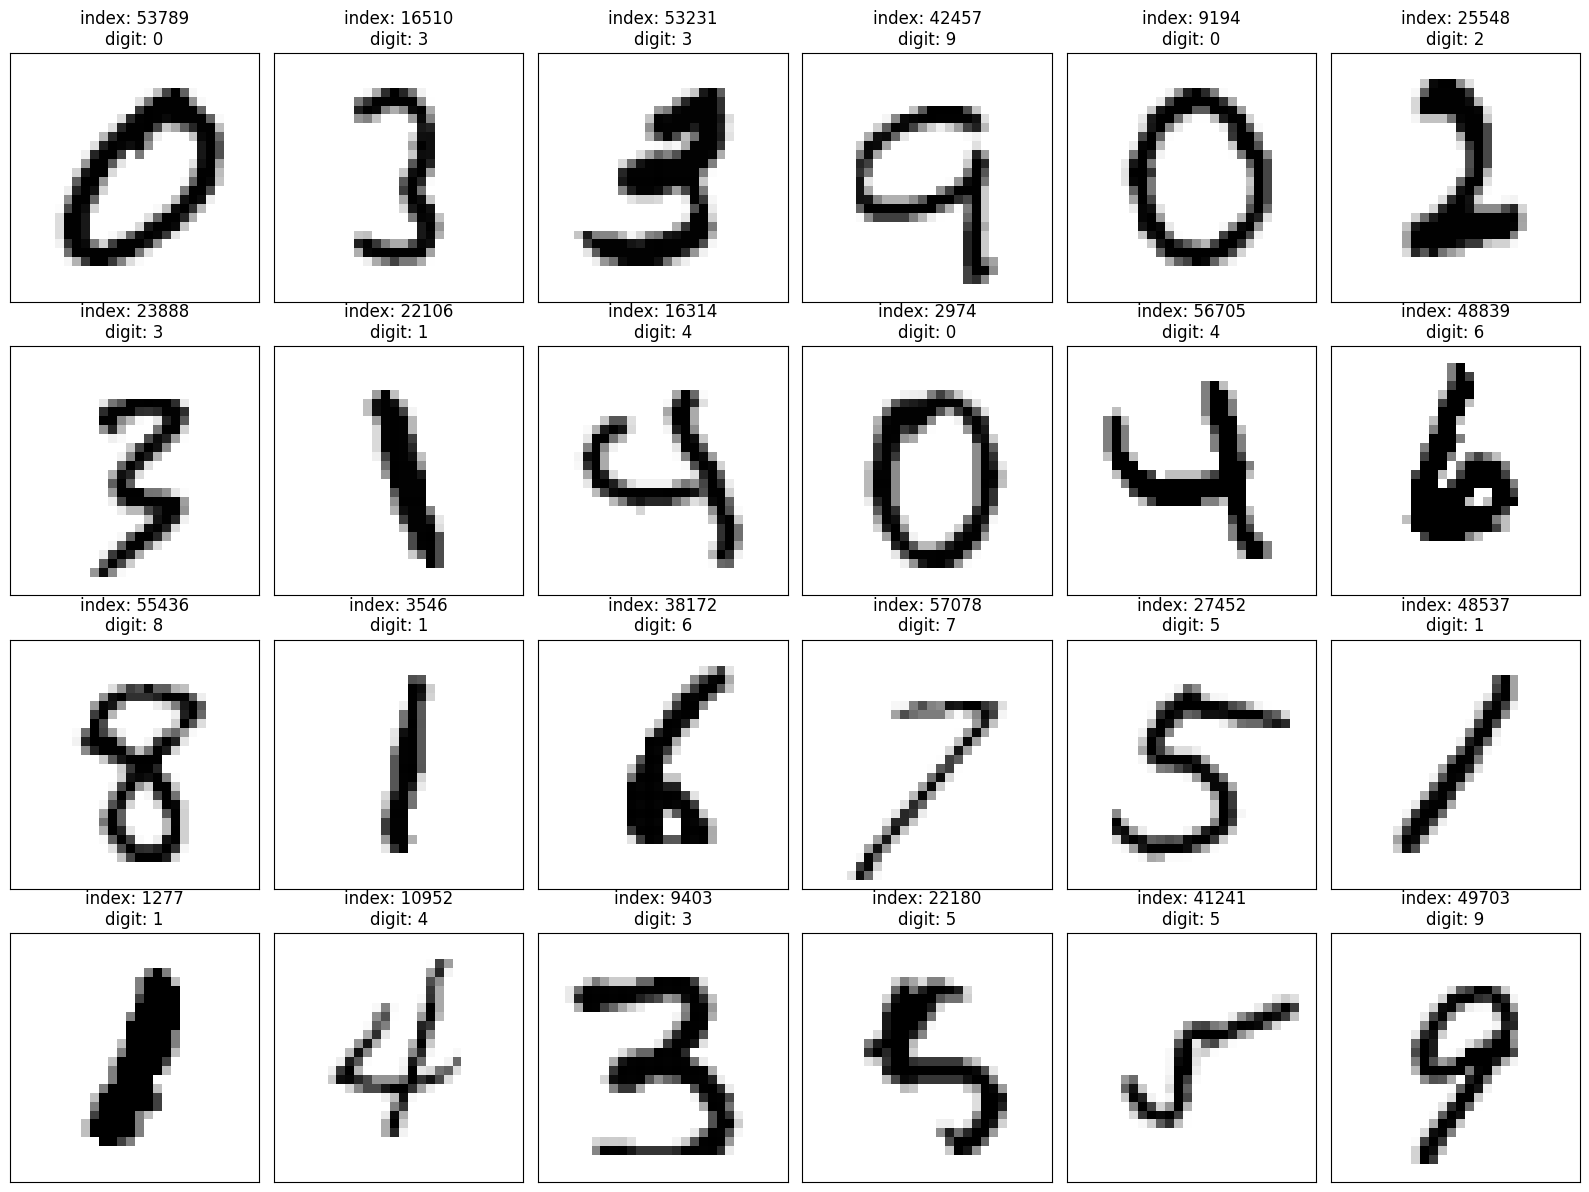

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.8754 - loss: 0.4234
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9834 - loss: 0.0556
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9885 - loss: 0.0365
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9911 - loss: 0.0270
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9935 - loss: 0.0206
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9943 - loss: 0.0169
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9962 - loss: 0.0115
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9966 - loss: 0.0103
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9974 - loss: 0.0087
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9974 - loss: 0.0082
Accuracy: 0.9908000230789185


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(X_train, y_train), (X_test, y_test) = mnist.load_data()

indices = np.random.choice(np.arange(len(X_train)), 24, replace=False)

fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, idx, image, target in zip(axes.ravel(), indices, X_train[indices], y_train[indices]):
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {idx}\ndigit: {class_names[target]}')
plt.tight_layout()
plt.show()

X_train = X_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
X_test  = X_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)

mnist_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mnist_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mnist_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1)
test_loss, acc_percentage = mnist_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy:', acc_percentage)

The MNIST model is performing better and is more accurate at 99% vs than the Fashion MNIST Model at 89%